In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip'

--2024-11-14 11:05:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00294/CCPP.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘CCPP.zip’

CCPP.zip                [ <=>                ]   3.50M  --.-KB/s    in 0.08s   

2024-11-14 11:05:51 (41.7 MB/s) - ‘CCPP.zip’ saved [3674852]



In [ ]:
!unzip "/content/CCPP.zip"

Archive:  /content/CCPP.zip
   creating: CCPP/
  inflating: CCPP/Folds5x2_pp.ods    
  inflating: CCPP/Folds5x2_pp.xlsx   
  inflating: CCPP/Readme.txt         
  inflating: CCPP/Readme.txt~        


In [ ]:
df = pd.read_excel("/content/CCPP/Folds5x2_pp.xlsx")

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
def get_output(df):
  y1 = df.pop("PE")
  y1 = np.array(y1)
  y2 = df.pop("V")
  y2 = np.array(y2)
  return y1, y2

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
y_train = get_output(X_train)
y_test = get_output(X_test)

In [ ]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

## Sequential

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train[0], validation_data=(X_test, y_test[0]), batch_size=128, epochs=400)

Epoch 1/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 206876.8125 - val_loss: 206500.8281
Epoch 2/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206735.9531 - val_loss: 206393.2656
Epoch 3/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206857.3594 - val_loss: 205706.6719
Epoch 4/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205553.4531 - val_loss: 204699.3281
Epoch 5/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204931.9844 - val_loss: 203451.0312
Epoch 6/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203449.7812 - val_loss: 201896.9062
Epoch 7/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201723.3906 - val_loss: 199996.9844
Epoch 8/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 199667.5938 - val_loss: 197719.6562
Epoch 9/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197180.5156 - val_loss: 195036.2188
Epoch 10/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194272.1875 - val_loss: 191928.3750
Epoch 11/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train[1],
          validation_data=(X_test, y_test[1]),
          batch_size=128,
          epochs=400)

Epoch 1/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3080.9148 - val_loss: 3054.9751
Epoch 2/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3027.0562 - val_loss: 2969.8672
Epoch 3/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2907.2070 - val_loss: 2850.1672
Epoch 4/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2804.4597 - val_loss: 2649.7681
Epoch 5/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2556.8357 - val_loss: 2394.1143
Epoch 6/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2317.9119 - val_loss: 2082.6990
Epoch 7/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1993.8787 - val_loss: 1728.7699
Epoch 8/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1592.4669 - val_loss: 1247.8646
Epoch 9/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1090.9945 - val_loss: 716.8168
Epoch 10/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 615.4148 - val_loss: 378.2979
Epoch 11/400
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 332.6286 - val_loss: 223.2887
E

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

## Functional

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
input_layer = Input(shape=(3, ))
layer_1 = Dense(4, activation='relu')(input_layer)
layer_2 = Dense(4, activation='relu')(layer_1)
output = Dense(1, activation='linear')(layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train[0], validation_data=(X_test, y_test[0]), batch_size=128, epochs=300)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 206567.6875 - val_loss: 206446.2188
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 207074.7969 - val_loss: 206389.4062
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206866.6562 - val_loss: 206334.6094
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 207042.0938 - val_loss: 206280.0625
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206550.6094 - val_loss: 206225.5938
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206541.0312 - val_loss: 206171.0781
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206296.3906 - val_loss: 206116.6719
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206265.8906 - val_loss: 206062.2344
Epoch 9/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206730.0156 - val_loss: 206007.8125
Epoch 10/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206310.7031 - val_loss: 205953.4062
Epoch 11/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

In [ ]:
input_layer = Input(shape=(3, ))
layer_1 = Dense(4, activation='relu')(input_layer)
layer_2 = Dense(4, activation='relu')(layer_1)
output_layer = Dense(1, activation='linear')(layer_2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train[1], validation_data=(X_test, y_test[1]), batch_size=128, epochs=300)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3043.3298 - val_loss: 3040.1589
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3015.0586 - val_loss: 2961.0410
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2900.3372 - val_loss: 2844.7209
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2785.1746 - val_loss: 2685.8313
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2638.7891 - val_loss: 2483.0464
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2409.5830 - val_loss: 2238.2585
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2155.9062 - val_loss: 1959.0559
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1881.3728 - val_loss: 1657.0751
Epoch 9/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1566.5704 - val_loss: 1349.8750
Epoch 10/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1276.1920 - val_loss: 1055.9457
Epoch 11/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 991.8748 - val_loss: 794.572

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

In [ ]:
input_layer = Input(shape=(3, ), name='input_layer')
layer_1 = Dense(10, activation='relu', name='layer_1')(input_layer)
layer_2 = Dense(10, activation='relu', name='layer_2')(layer_1)
output_layer_1 = Dense(1, activation='linear', name='output_layer_1')(layer_2)
branched_layer = Dense(10, activation='relu', name='branched_layer')(layer_2)
output_layer_2 = Dense(1, activation='linear', name='output_layer_2')(branched_layer)

model = Model(inputs=input_layer, outputs=[output_layer_1, output_layer_2])

In [ ]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_1 (Dense)           │ (None, 10)             │             40 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_2 (Dense)           │ (None, 10)             │            110 │ layer_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ branched_layer (Dense)    │ (None, 10)             │            110 │ layer_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_layer_1 (Dense)    │ (None, 1)              │             11 │ layer_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_layer_2 (Dense)    │ (None, 1)              │             11 │ branched_layer[0][0]   │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss={'output_layer_1': 'mse', 'output_layer_2': 'mse'})

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=300, verbose=True)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 209166.9531 - val_loss: 208505.0938
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 208428.9844 - val_loss: 206163.8281
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205329.0000 - val_loss: 199906.4375
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197711.5938 - val_loss: 188579.6719
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185333.7812 - val_loss: 173544.2500
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169360.8750 - val_loss: 153188.8438
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146972.4844 - val_loss: 127039.0234
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120124.5391 - val_loss: 97848.9219
Epoch 9/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90675.5312 - val_loss: 68920.3672
Epoch 10/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62549.7461 - val_loss: 43644.5781
Epoch 11/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [ ]:
predictions = model.predict(X_test)
predicted_energy = predictions[0]
predicted_vacuum = predictions[1]

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Text(0, 0.5, 'predicted energy output')

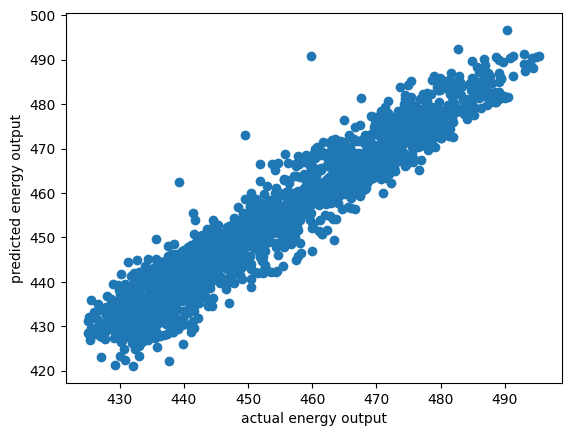

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test[0], predicted_energy)
ax.set_xlabel('actual energy output')
ax.set_ylabel('predicted energy output')

Text(0, 0.5, 'predicted exhaust vacuum')

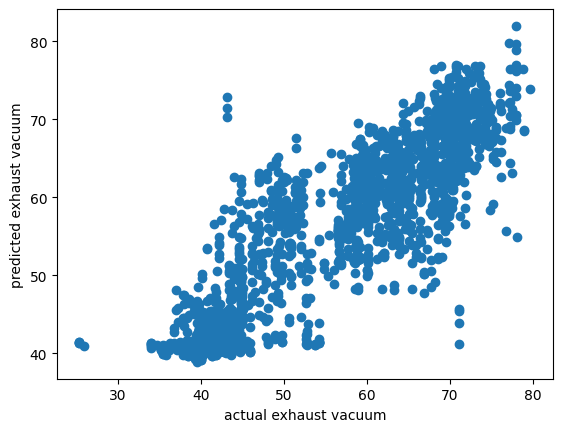

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test[1], predicted_vacuum)
ax.set_xlabel('actual exhaust vacuum')
ax.set_ylabel('predicted exhaust vacuum')

In [ ]:
print('r2 score for energy predicted:', r2_score(y_test[0], predicted_energy))
print('r2 score for exhaust vacuum predicted', r2_score(y_test[1], predicted_vacuum))

r2 score for energy predicted: 0.9219674019477665
r2 score for exhaust vacuum predicted 0.7875319126770495
